In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from aging.size_norm.util import load_model_parameters
from aging.plotting import format_plots, PlotConfig, save_factory, figure

In [2]:
format_plots()
c = PlotConfig()
saver = save_factory(c.save_path / 'size-normalization', tight_layout=False)

In [3]:
scan_path = Path('/n/groups/datta/win/longtogeny/size_norm/models/big_param_scan_00')

## Parameter count vs reconstruction error

In [4]:
metrics = list(scan_path.glob("stage_01/**/metrics.csv"))
results = load_model_parameters(metrics)

In [5]:
arch_rename = dict(ae='Autoencoder', unet='UNet', efficient='AE + EfficientNet conv', efficient_unet='UNet + EfficientNet conv')
results['arch'] = results['arch'].map(arch_rename)

In [6]:
results = (
    results.query("epoch == 100")
    .groupby(["init_channel", "arch", "channel_scaling", "epoch"])
    .mean(numeric_only=True)
    .reset_index()
)

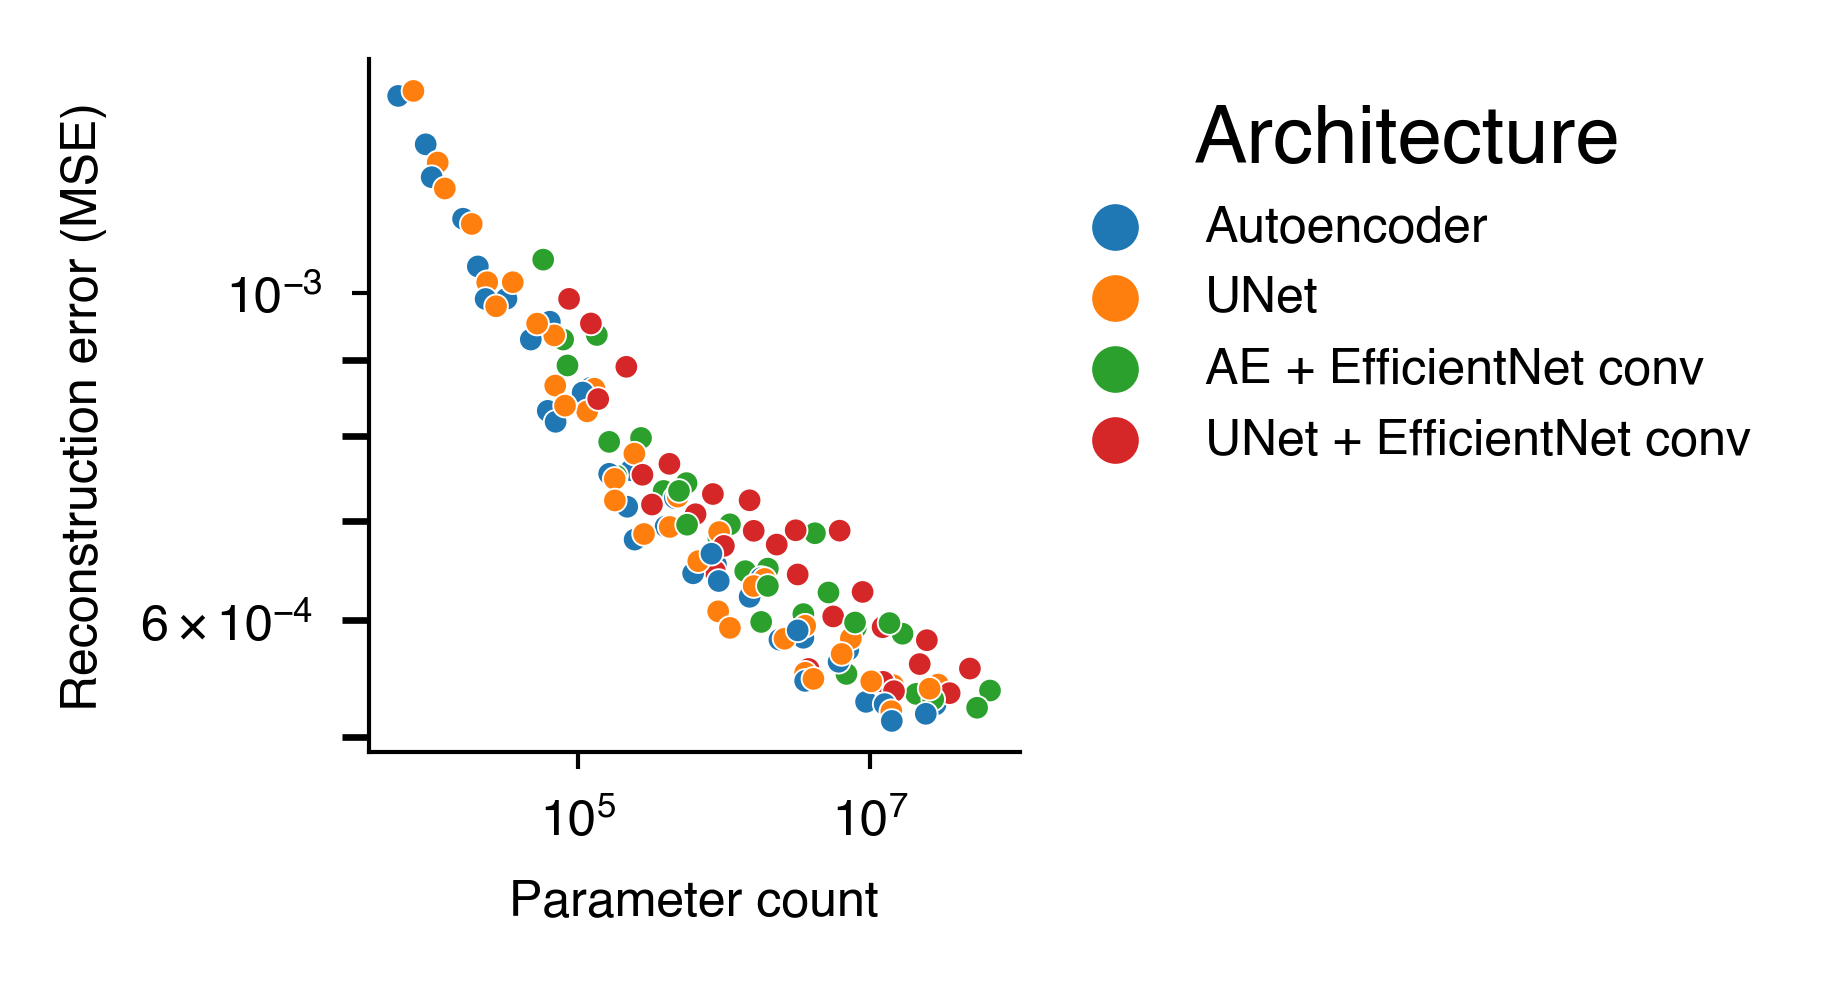

In [7]:
fig = figure(1.4, 1.5)
ax = sns.scatterplot(
    data=results,
    x="param_count",
    y="val_mse",
    hue="arch",
    s=8,
    hue_order=[
        "Autoencoder",
        "UNet",
        "AE + EfficientNet conv",
        "UNet + EfficientNet conv",
    ],
)
ax.set(
    xscale="log",
    yscale="log",
    xlabel="Parameter count",
    ylabel="Reconstruction error (MSE)",
)
ax.legend(loc="upper left", bbox_to_anchor=(1, 1), frameon=False, title="Architecture")
sns.despine()
# saver(fig, "parameter_counts_vs_mse");

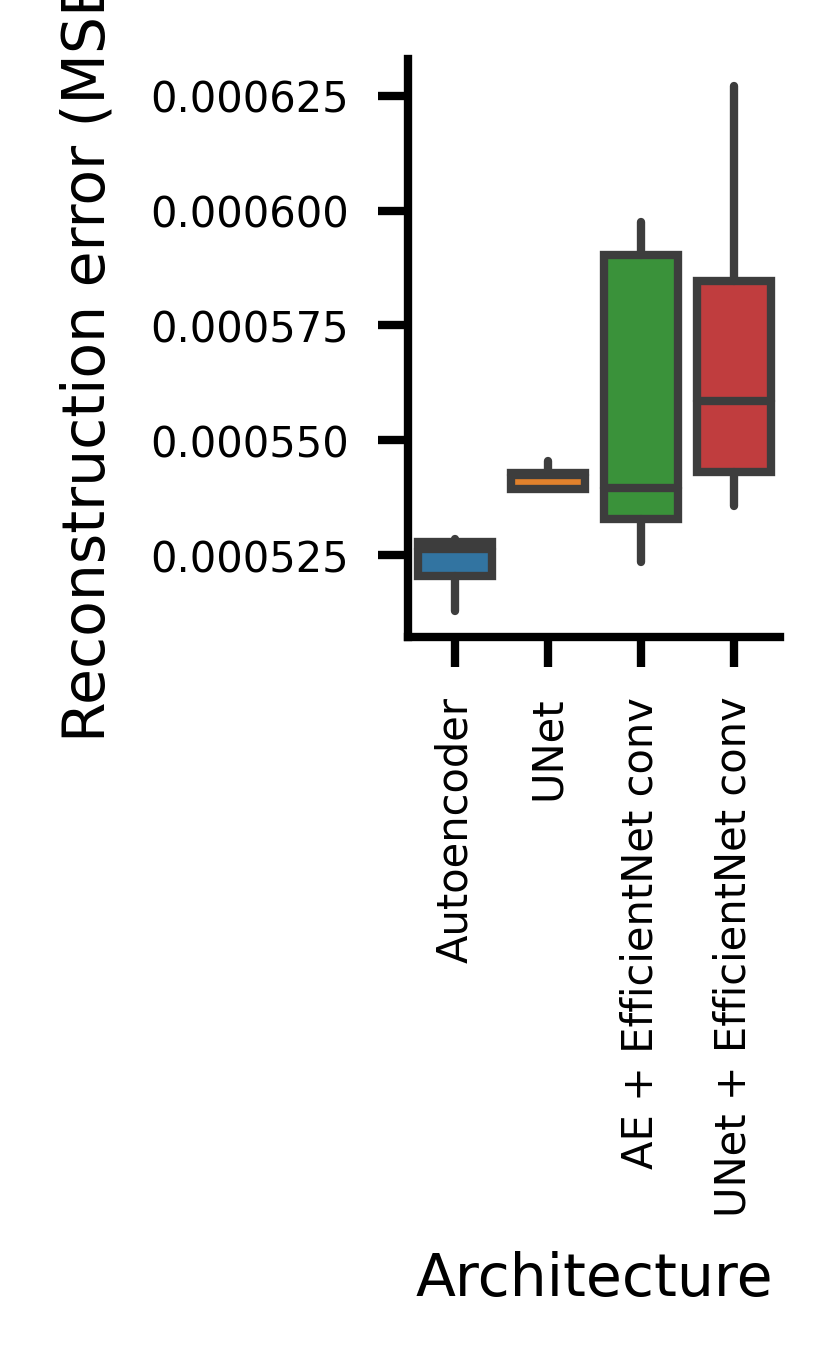

In [10]:
mask = results["param_count"].between(0.8e7, 6e7)
examples = results[mask]

fig = figure(0.8, 1.25)
ax = sns.boxplot(
    data=examples,
    x="arch",
    y="val_mse",
    order=["Autoencoder", "UNet", "AE + EfficientNet conv", "UNet + EfficientNet conv"],
    showfliers=False,
    showcaps=False,
)
ax.set(xlabel='Architecture', ylabel='Reconstruction error (MSE)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
sns.despine()
saver(fig, 'arch-vs-mse');

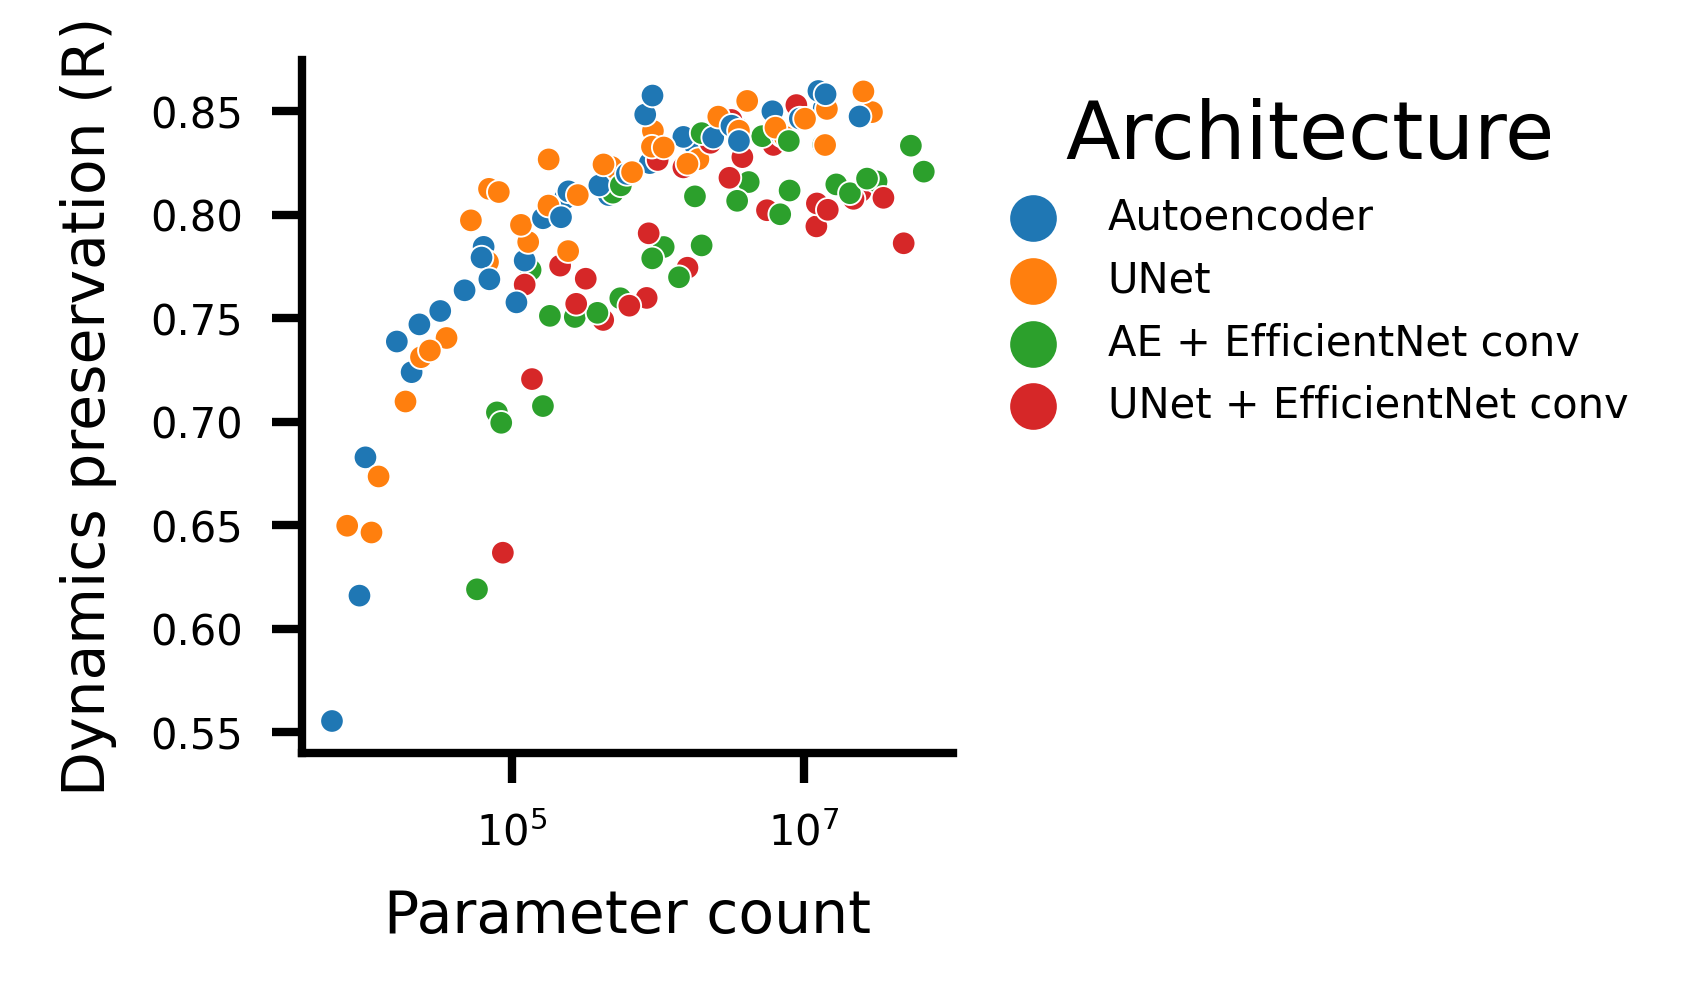

In [11]:
fig = figure(1.4, 1.5)
ax = sns.scatterplot(
    data=results,
    x="param_count",
    y="dynamics_corr",
    hue="arch",
    s=8,
    hue_order=[
        "Autoencoder",
        "UNet",
        "AE + EfficientNet conv",
        "UNet + EfficientNet conv",
    ],
)
ax.set(
    xscale="log",
    xlabel="Parameter count",
    ylabel="Dynamics preservation (R)",
)
ax.legend(loc="upper left", bbox_to_anchor=(1, 1), frameon=False, title="Architecture")
sns.despine()
saver(fig, "parameter_counts_vs_beh_pres");

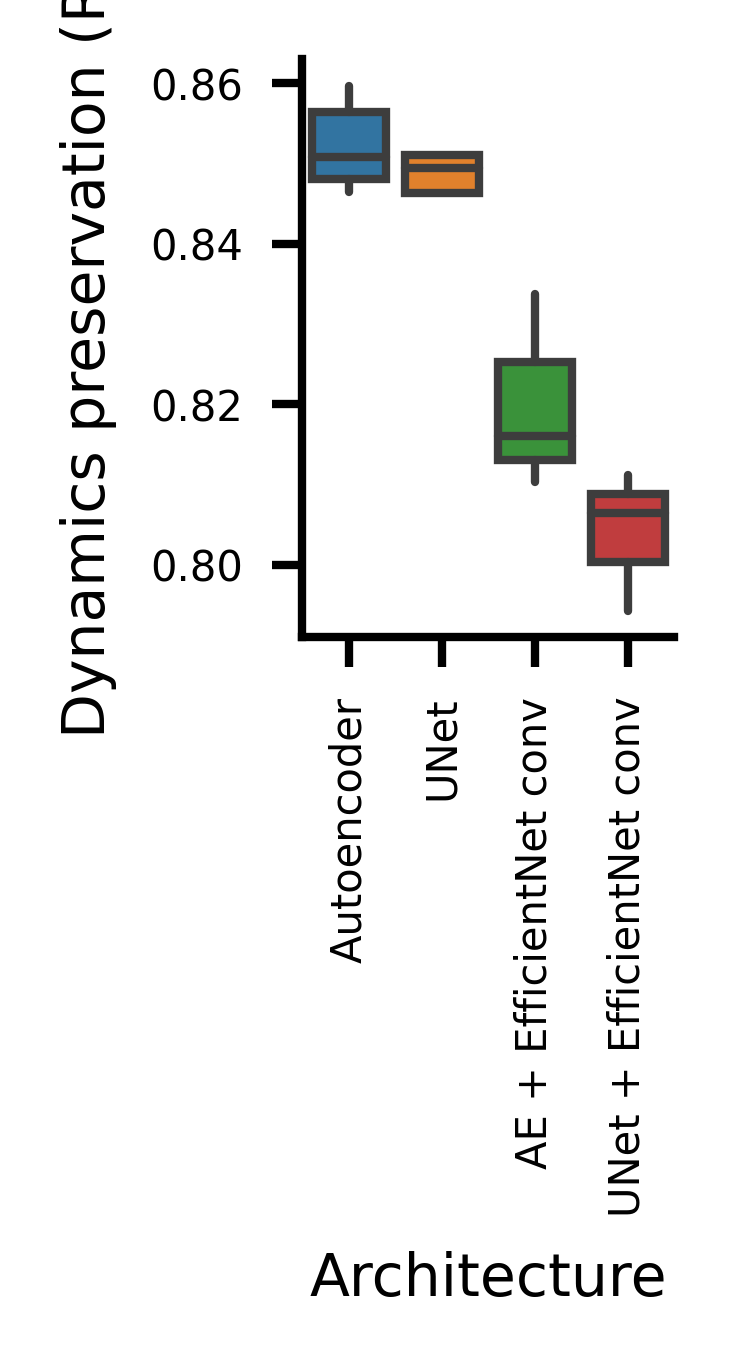

In [12]:
mask = results["param_count"].between(0.8e7, 6e7)
examples = results[mask]

fig = figure(0.8, 1.25)
ax = sns.boxplot(
    data=examples,
    x="arch",
    y="dynamics_corr",
    order=["Autoencoder", "UNet", "AE + EfficientNet conv", "UNet + EfficientNet conv"],
    showfliers=False,
    showcaps=False,
)
ax.set(
    xlabel='Architecture',
    ylabel="Dynamics preservation (R)",
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
sns.despine()
saver(fig, 'arch-vs-dynamics');

## Stage 2: depth

In [110]:
metrics = list(scan_path.glob("stage_02/**/metrics.csv"))
results = load_model_parameters(metrics).query('epoch == 100')

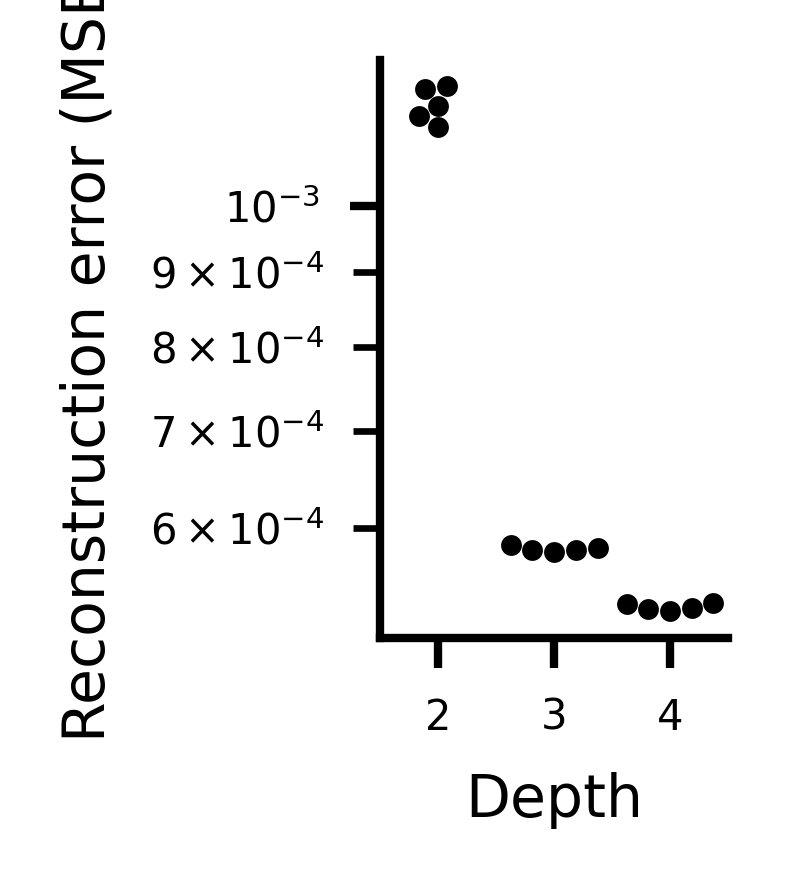

In [111]:
fig = figure(0.75, 1.25)
ax = sns.swarmplot(data=results, x='depth', y='val_mse', color='k', size=2.5)
ax.set(ylabel='Reconstruction error (MSE)', yscale='log', xlabel='Depth')
sns.despine()
saver(fig, 'depth-vs-mse');

## Stage 3

In [138]:
metrics = list(scan_path.glob("stage_03/**/metrics.csv"))
results = load_model_parameters(metrics).query('epoch == 100')
order = results.groupby('activation')['val_mse'].mean().sort_values().index

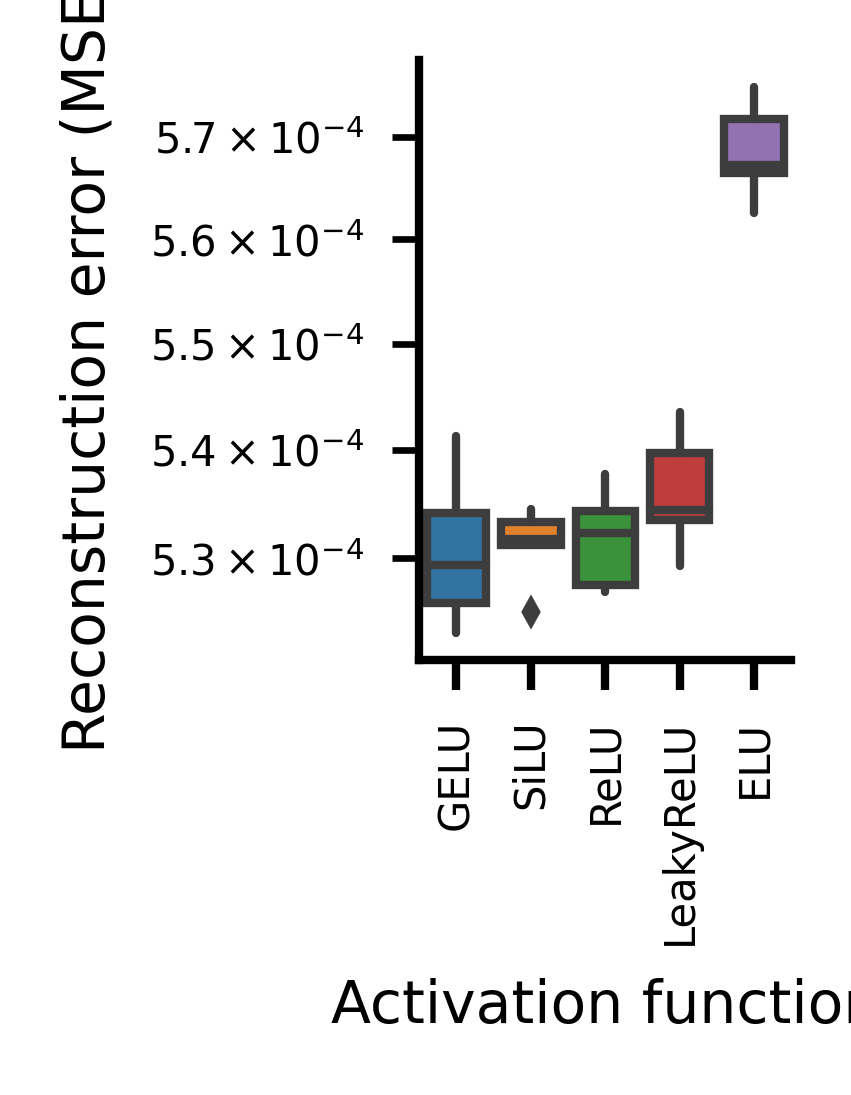

In [139]:
fig = figure(0.8, 1.3)
ax = sns.boxplot(data=results, x='activation', y='val_mse', showcaps=False, order=order, fliersize=1.5)
ax.set(ylabel='Reconstruction error (MSE)', xlabel='Activation function', yscale='log')
plt.xticks(rotation=90)
sns.despine()
saver(fig, 'activation-vs-mse');

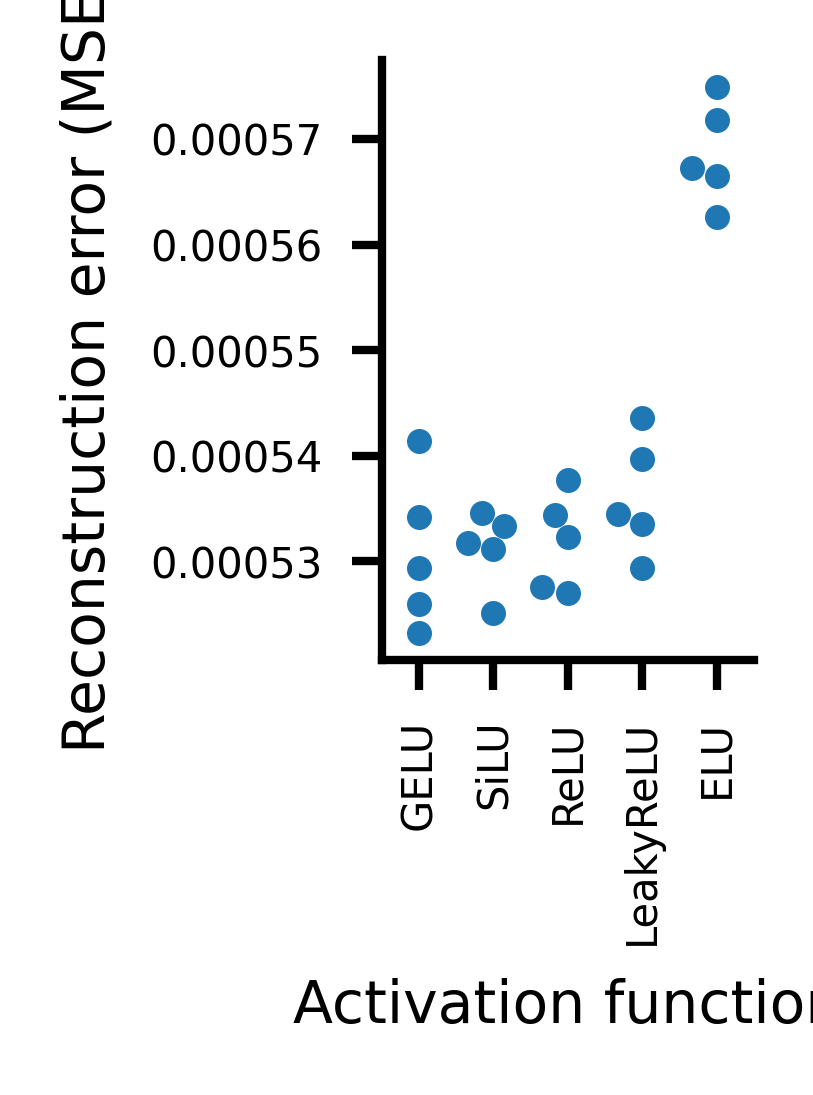

In [133]:
fig = figure(0.8, 1.3)
ax = sns.swarmplot(data=results, x='activation', y='val_mse', order=order, size=3)
ax.set(ylabel='Reconstruction error (MSE)', xlabel='Activation function')
plt.xticks(rotation=90)
sns.despine()

## Stage 4

In [146]:
metrics = list(scan_path.glob("stage_04/**/metrics.csv"))
results = load_model_parameters(metrics).query('epoch == 100')

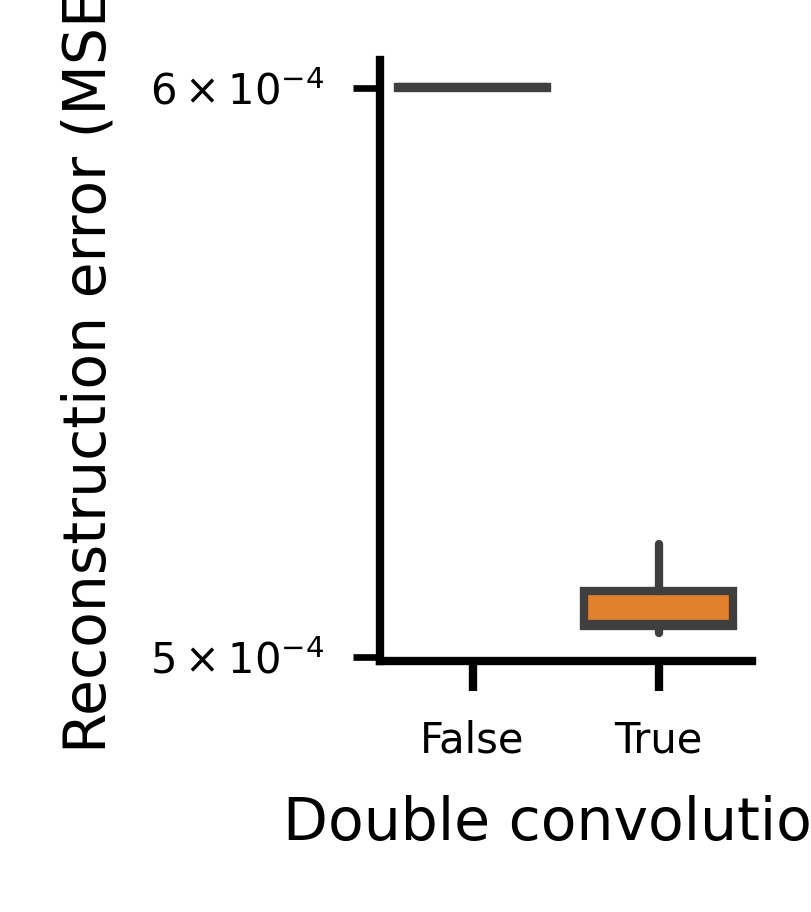

In [147]:
fig = figure(0.8, 1.3)
ax = sns.boxplot(data=results.query('residual'), x='double_conv', y='val_mse', showfliers=False, showcaps=False)
ax.set(ylabel='Reconstruction error (MSE)', yscale='log', xlabel='Double convolution')
sns.despine()
saver(fig, 'double_conv-vs-mse');

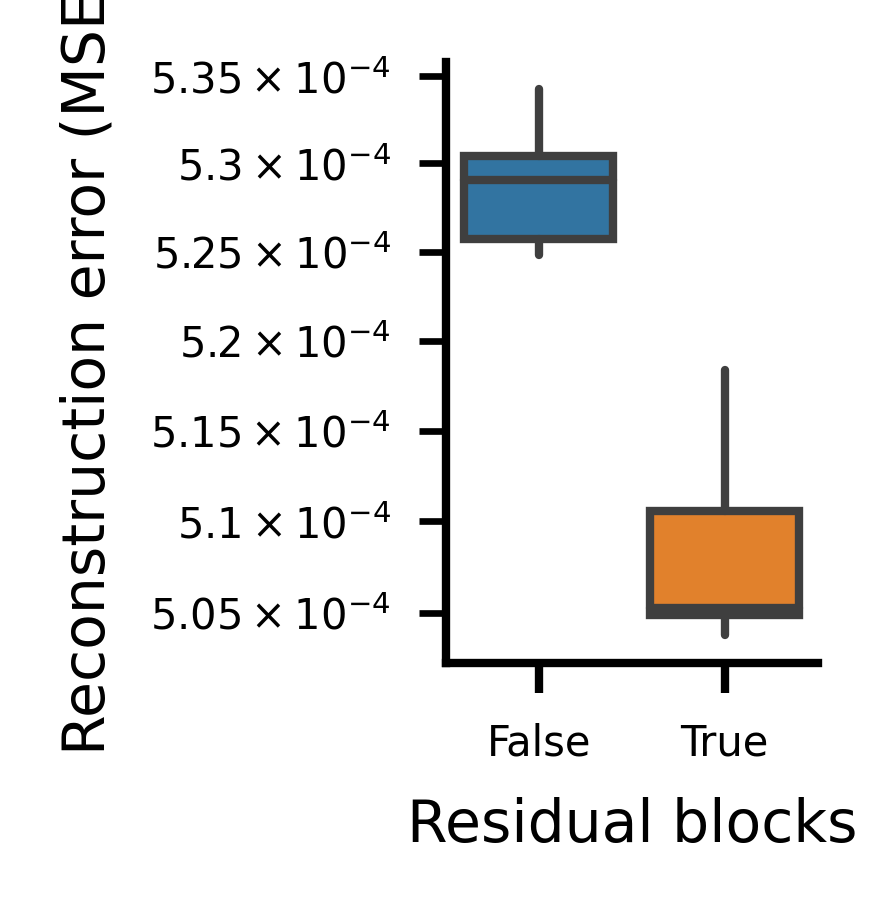

In [148]:
fig = figure(0.8, 1.3)
ax = sns.boxplot(data=results.query('double_conv'), x='residual', y='val_mse', showfliers=False, showcaps=False)
ax.set(ylabel='Reconstruction error (MSE)', yscale='log', xlabel='Residual blocks')
sns.despine()
saver(fig, 'residual-vs-mse');

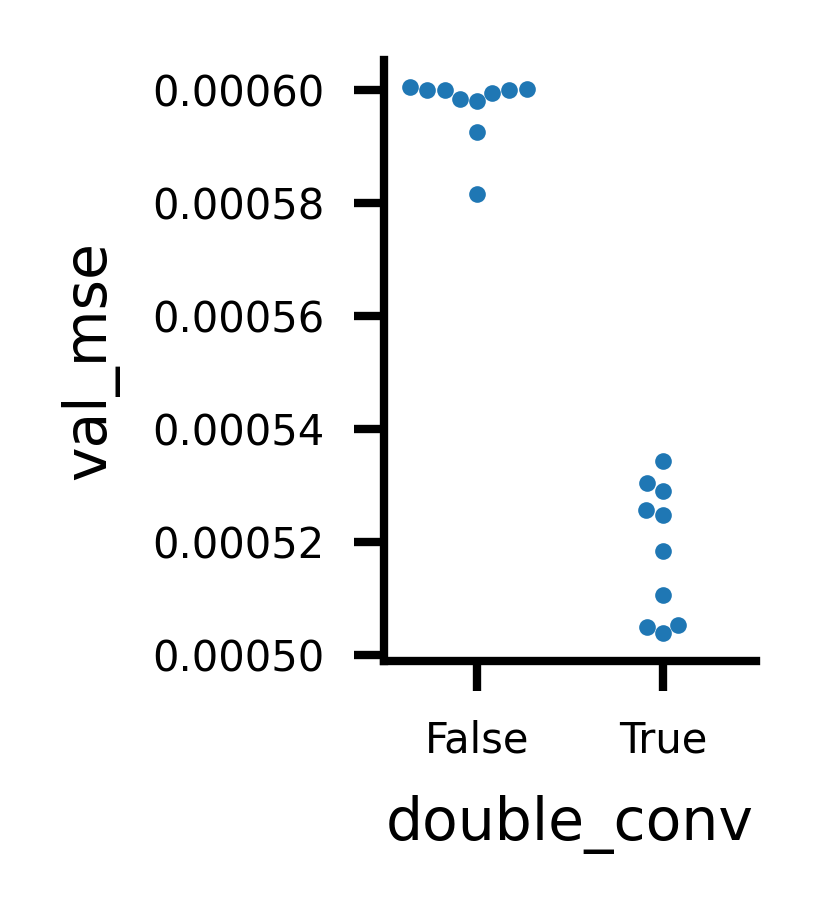

In [153]:
fig = figure(0.8, 1.3)
ax = sns.swarmplot(data=results, x='double_conv', y='val_mse', size=2)
sns.despine()

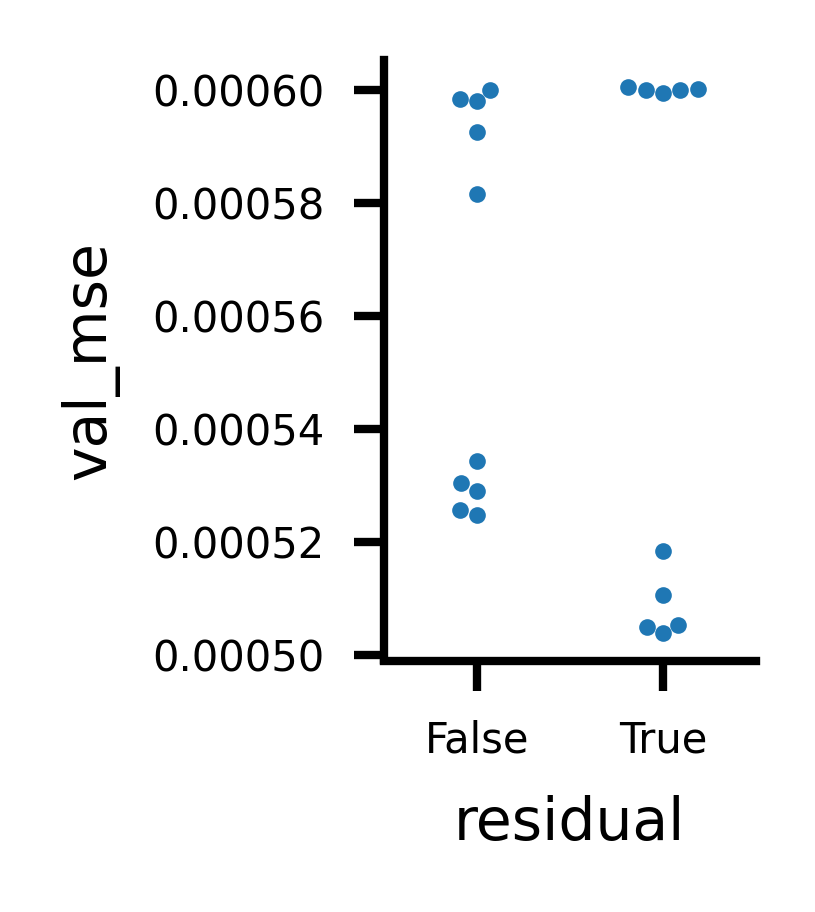

In [154]:
fig = figure(0.8, 1.3)
ax = sns.swarmplot(data=results, x='residual', y='val_mse', size=2)
sns.despine()

## Stage 5

In [1]:
metrics = list(scan_path.glob("stage_05/**/metrics.csv"))
results = load_model_parameters(metrics).query('epoch > 20')

NameError: name 'scan_path' is not defined

In [ ]:
results['epoch']

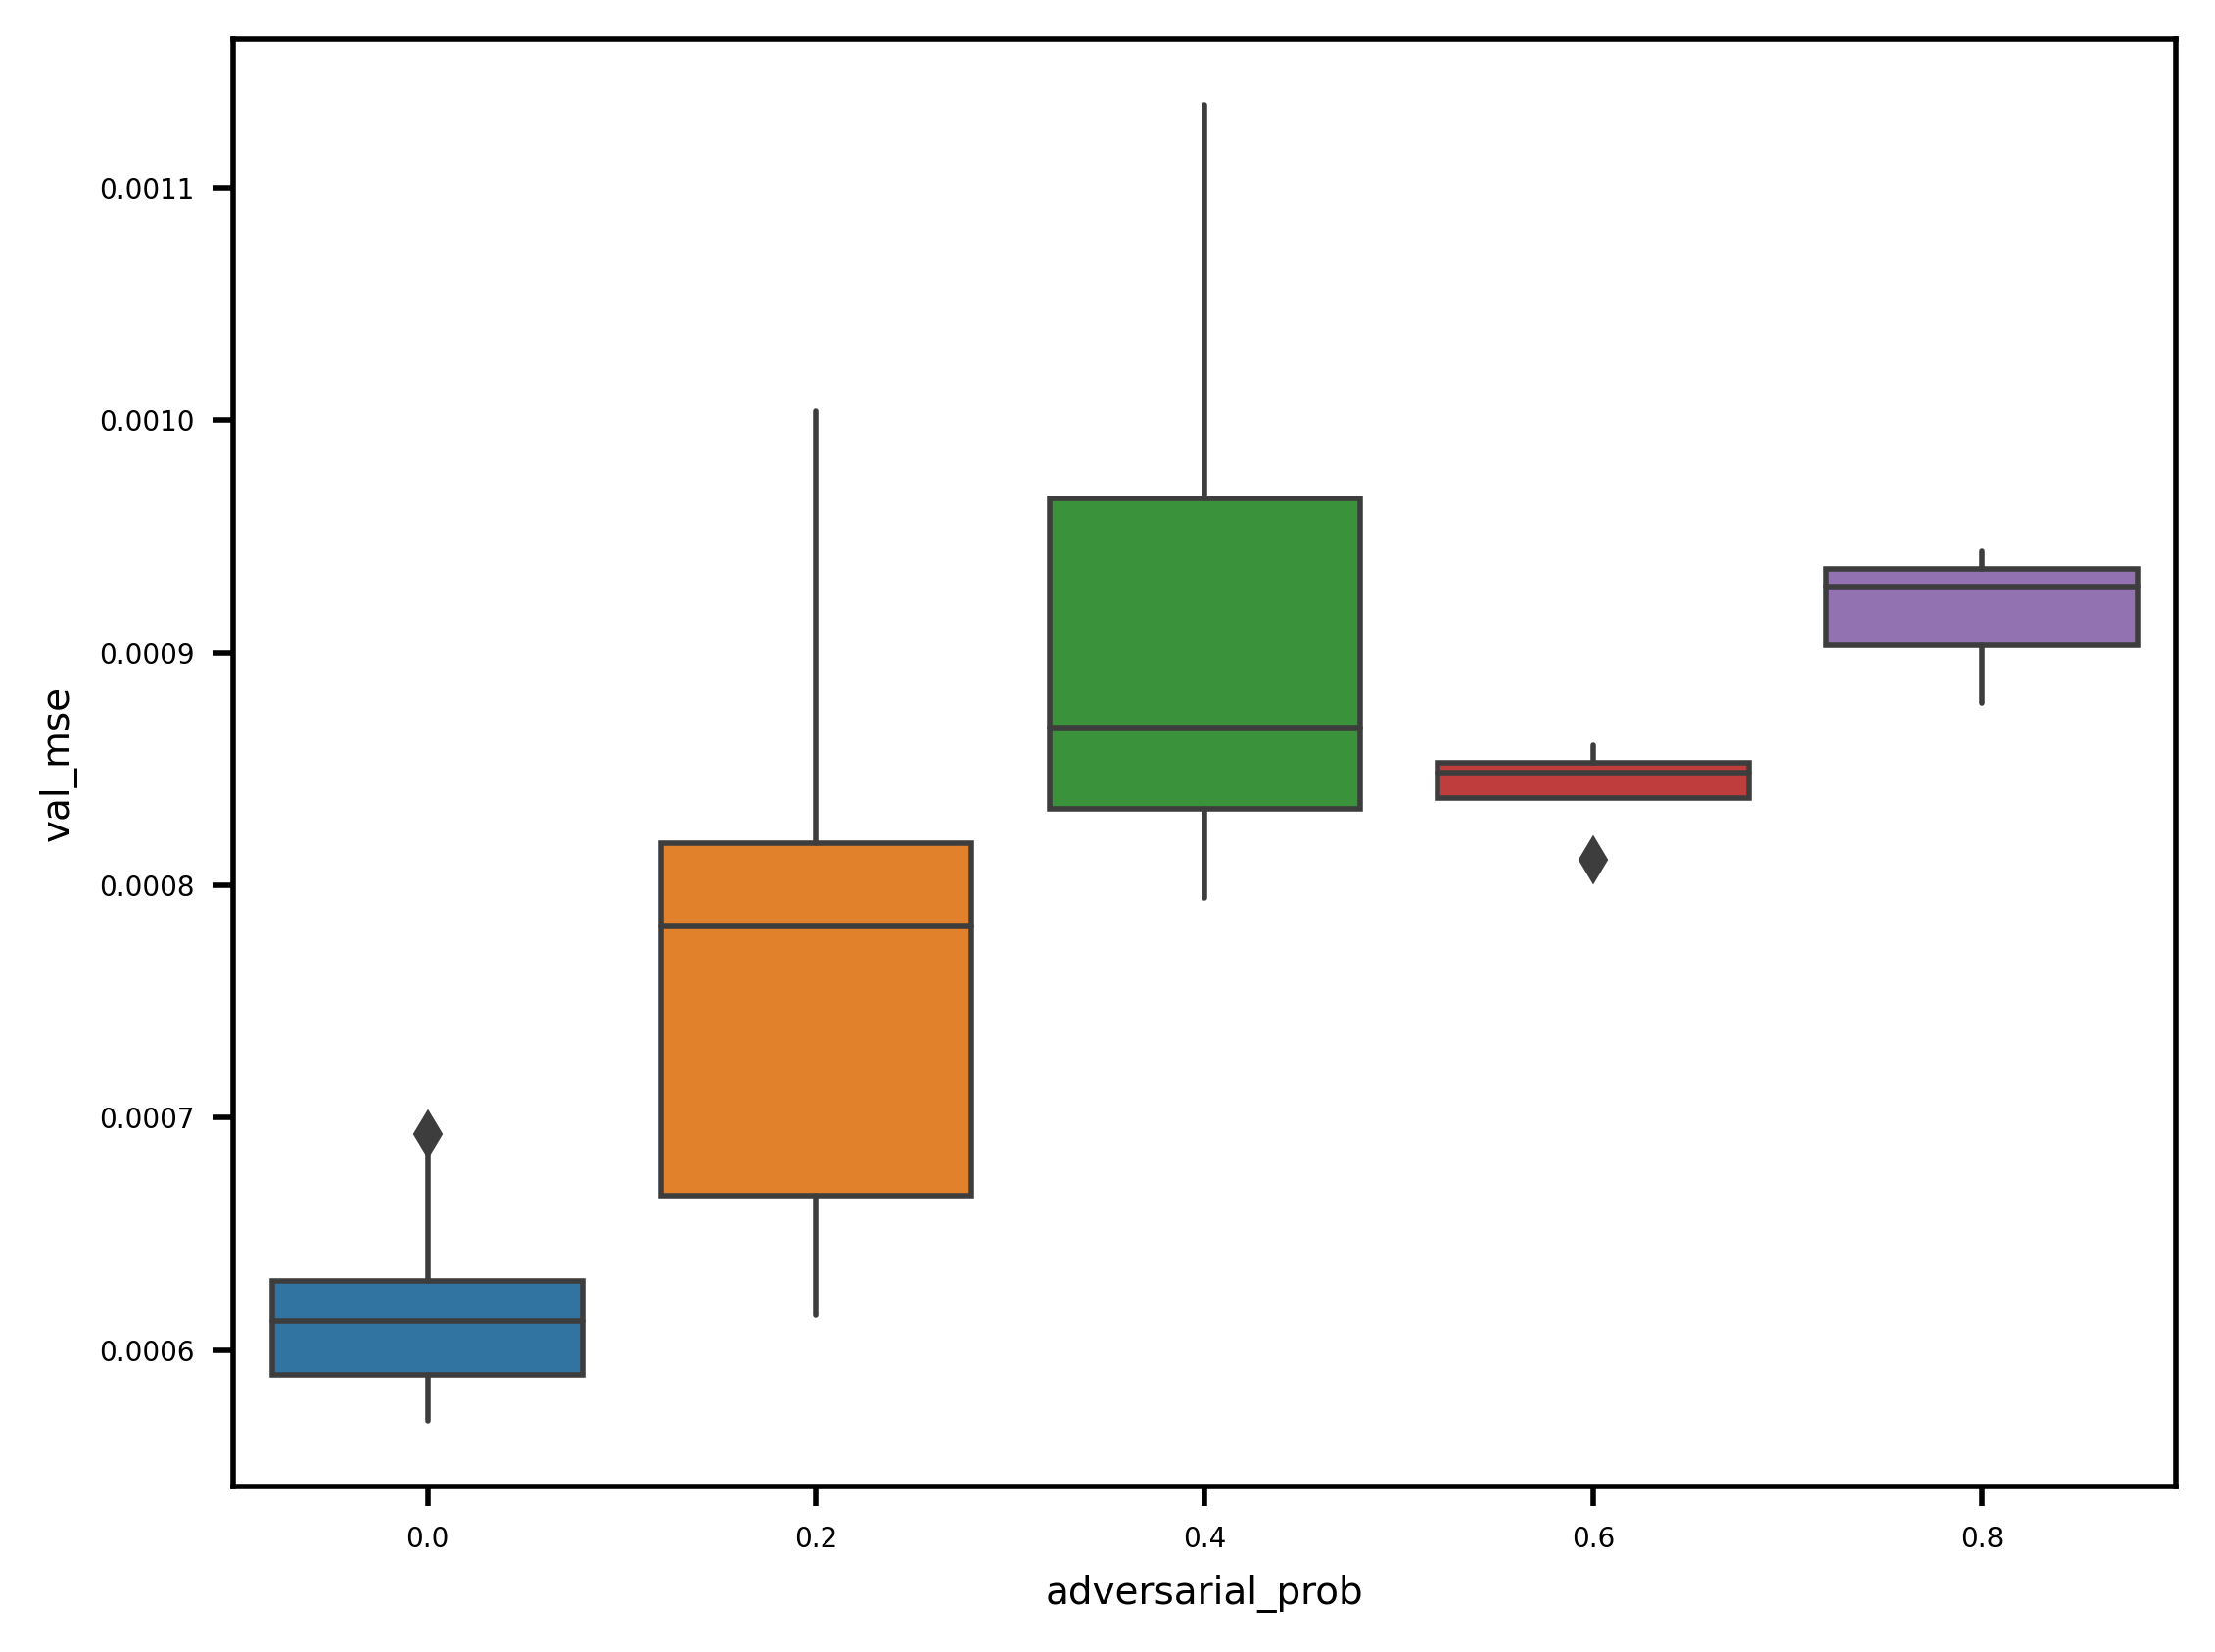

In [168]:
ax = sns.boxplot(data=results, x='adversarial_prob', y='val_mse', showcaps=False)

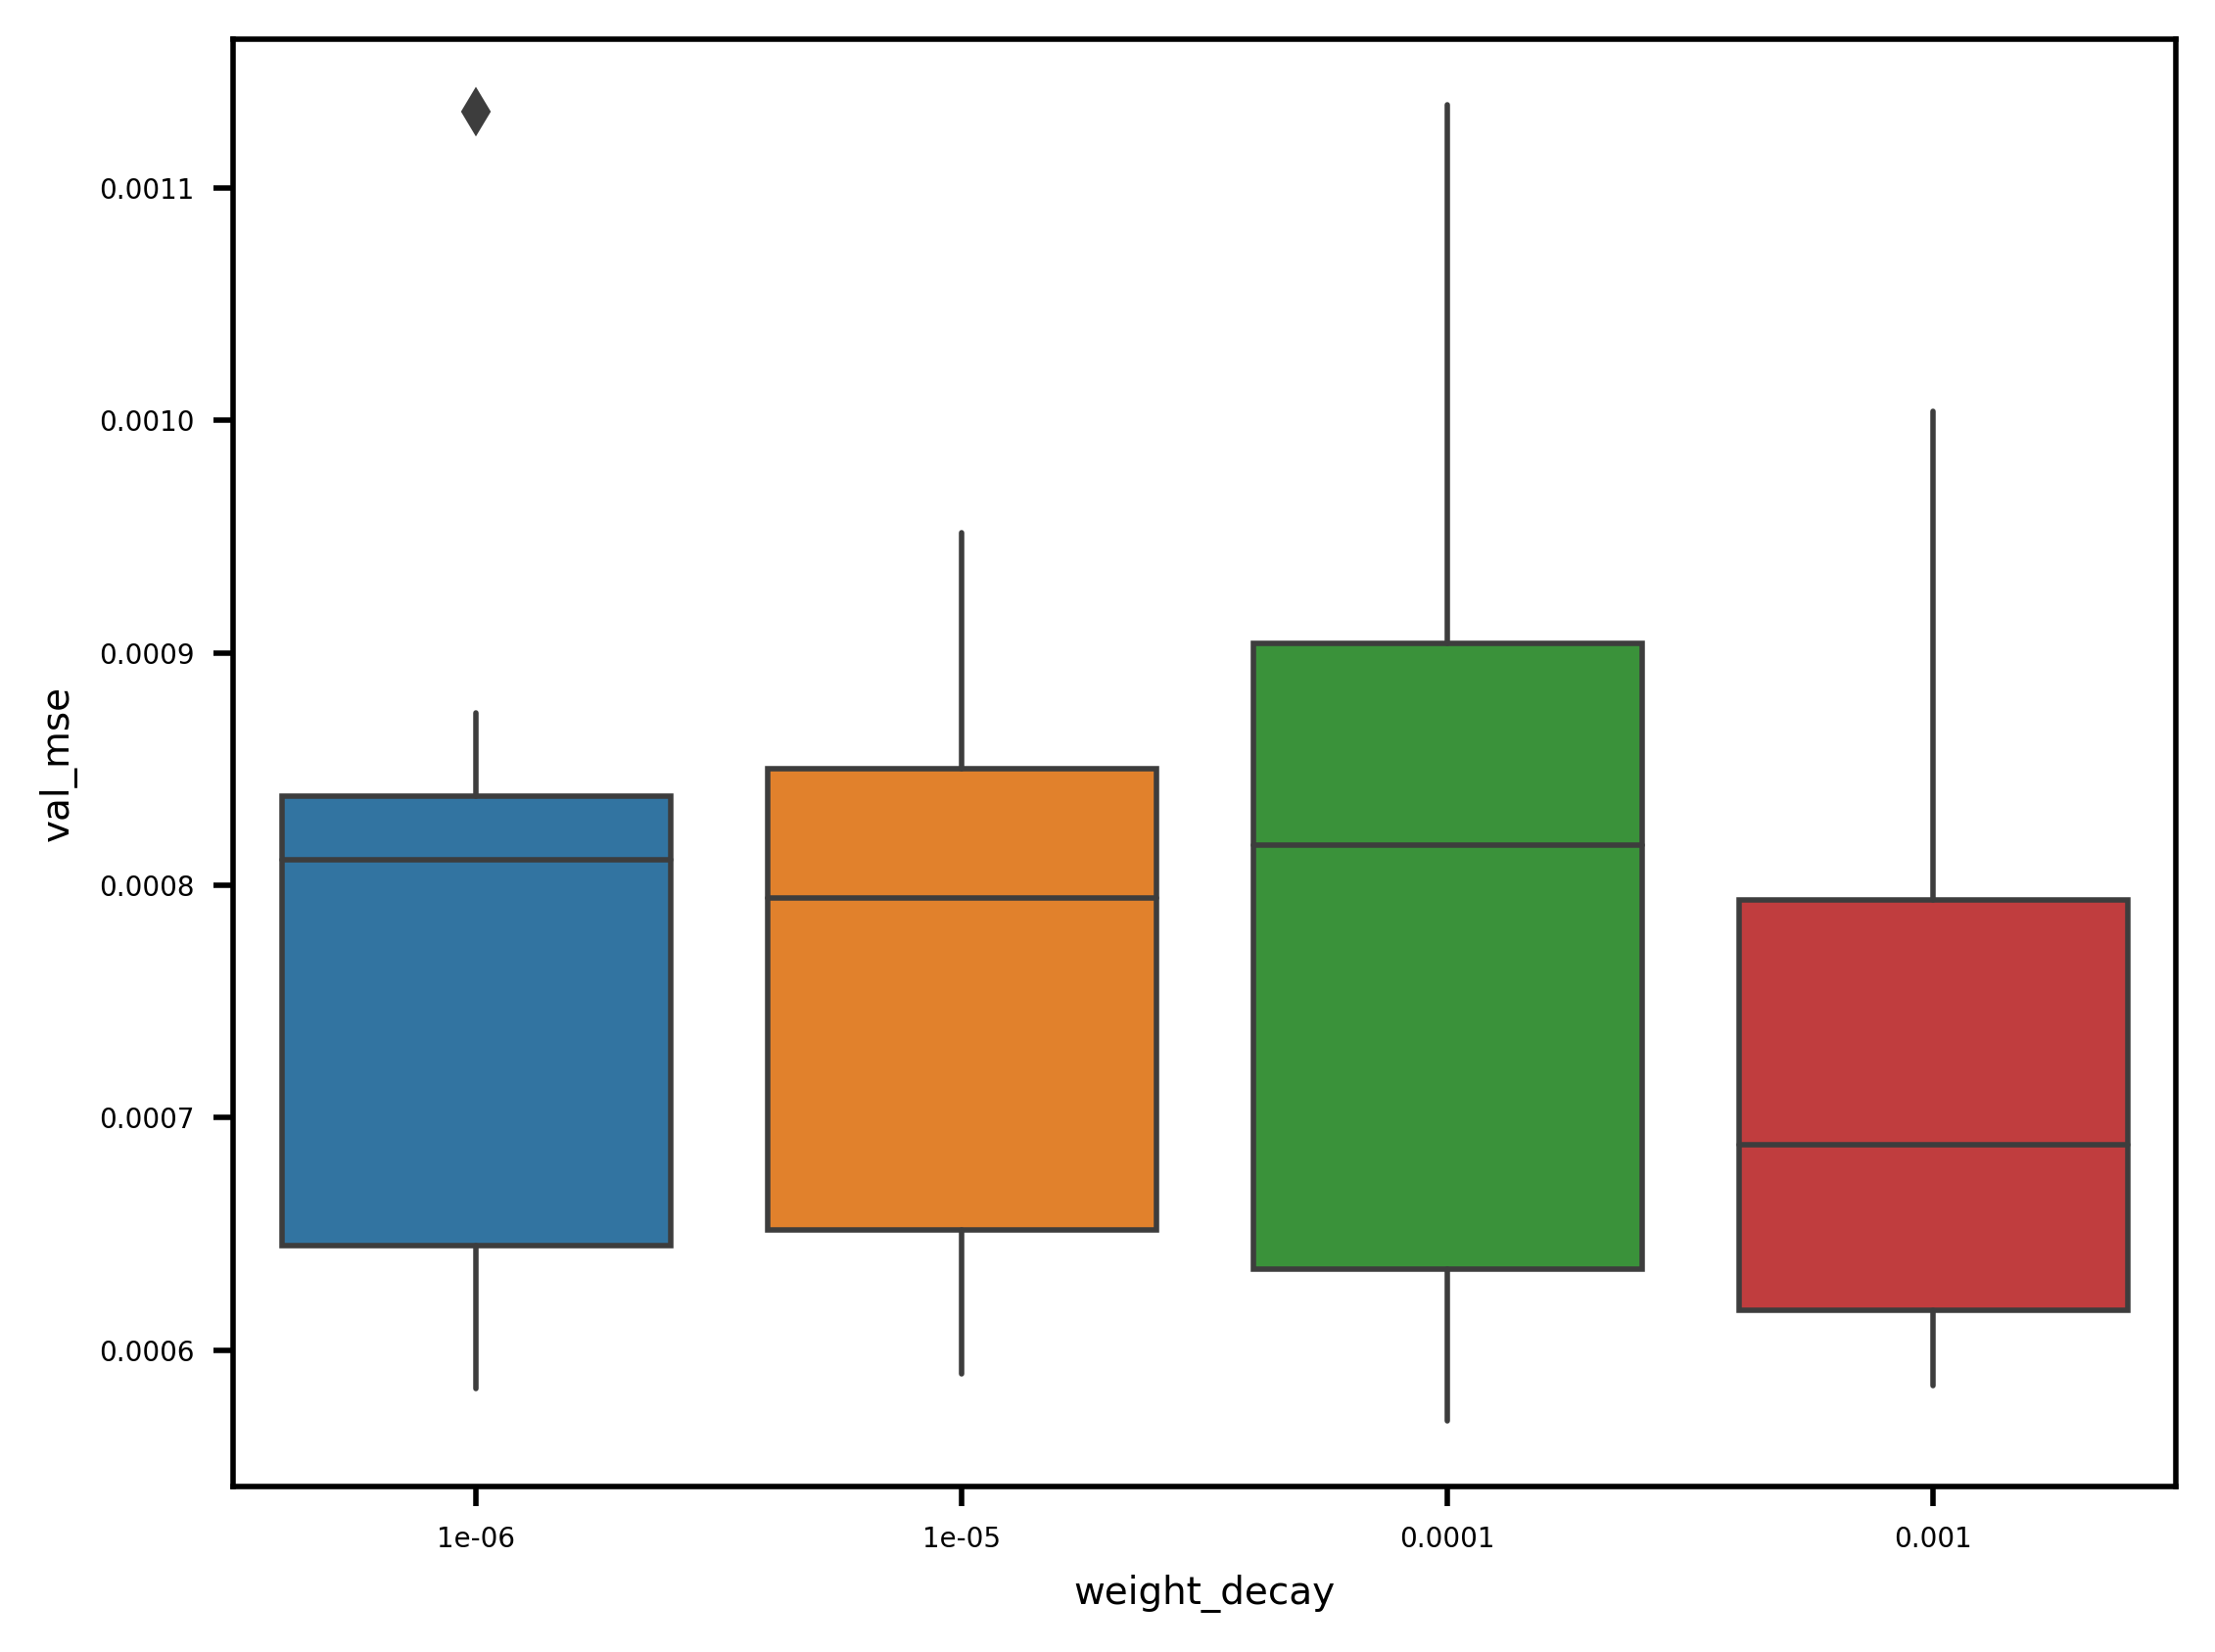

In [169]:
ax = sns.boxplot(data=results, x='weight_decay', y='val_mse', showcaps=False)

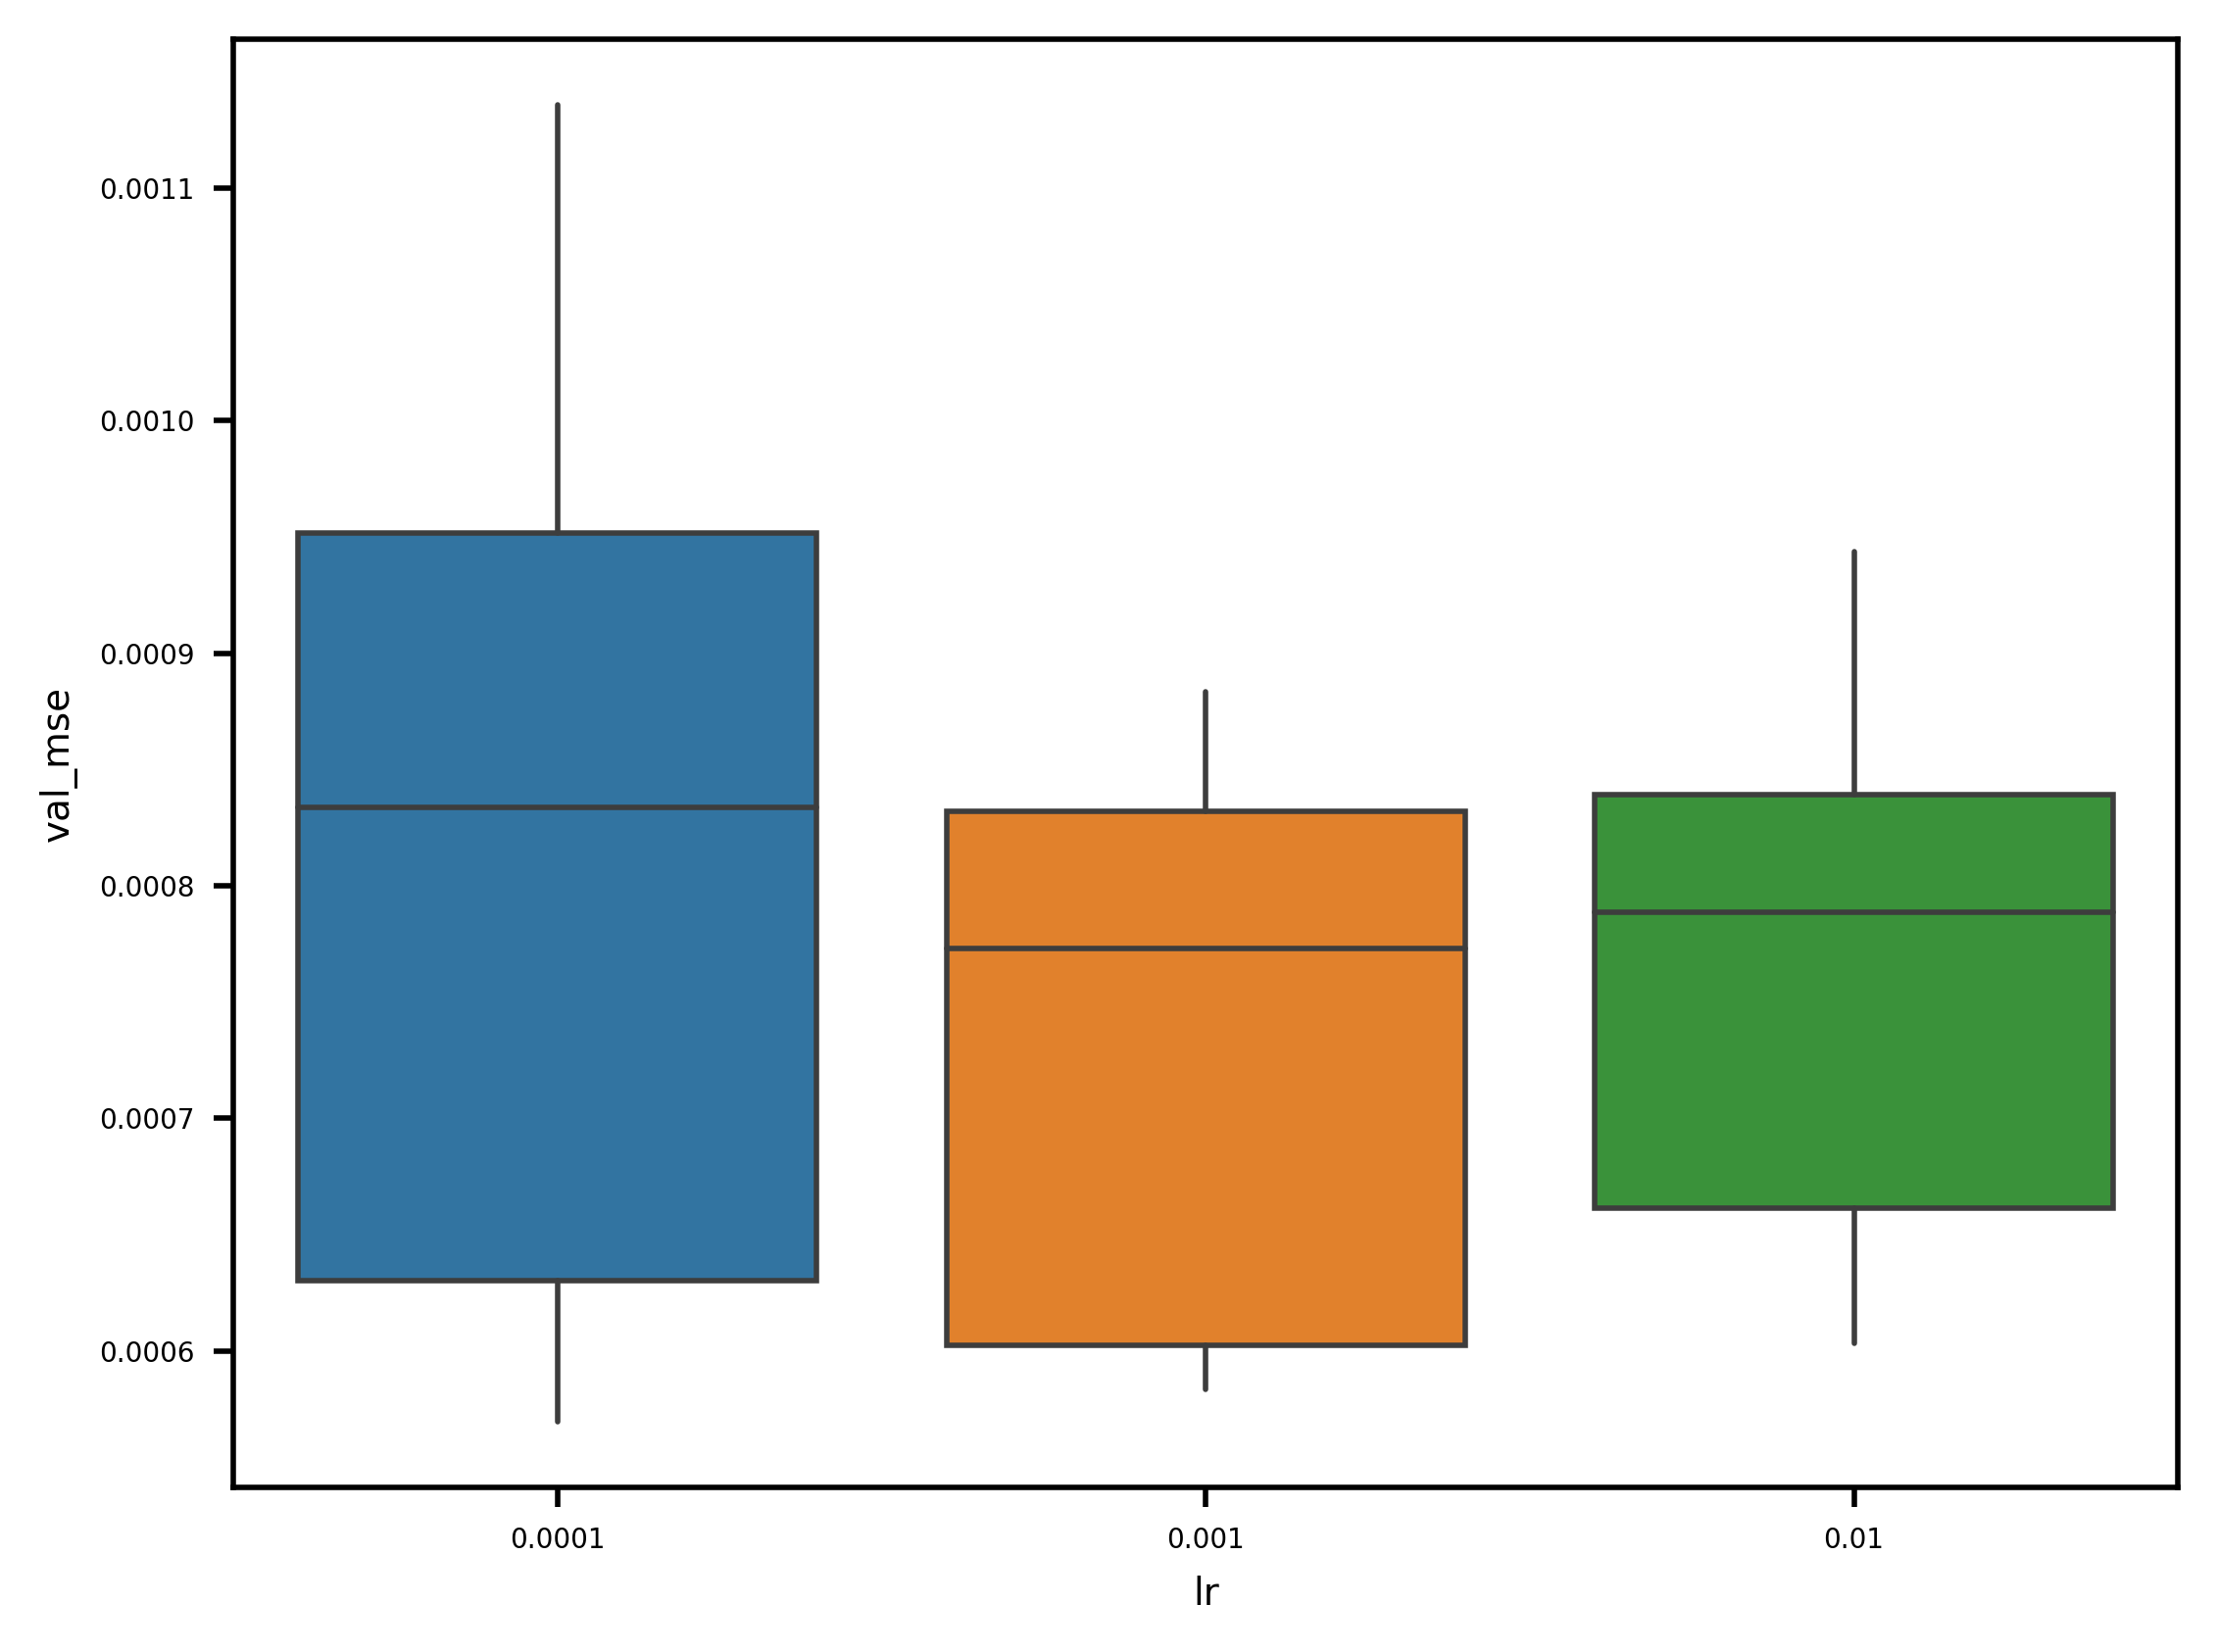

In [170]:
ax = sns.boxplot(data=results, x='lr', y='val_mse', showcaps=False)